
Training SVM (SGD)...
SVM (SGD) Validation Accuracy: 0.23
SVM (SGD) Test Accuracy: 0.22
              precision    recall  f1-score   support

      afraid       0.16      0.18      0.17       164
       angry       0.10      0.08      0.09       181
     annoyed       0.17      0.24      0.20       198
anticipating       0.14      0.13      0.13       166
     anxious       0.19      0.25      0.22       171
apprehensive       0.10      0.09      0.10       158
     ashamed       0.04      0.02      0.03       143
      caring       0.19      0.21      0.20       177
   confident       0.27      0.17      0.21       170
     content       0.33      0.28      0.30       172
  devastated       0.17      0.15      0.16       148
disappointed       0.13      0.10      0.11       188
   disgusted       0.34      0.36      0.35       190
 embarrassed       0.31      0.41      0.35       179
     excited       0.22      0.14      0.17       202
    faithful       0.21      0.21      0.21   

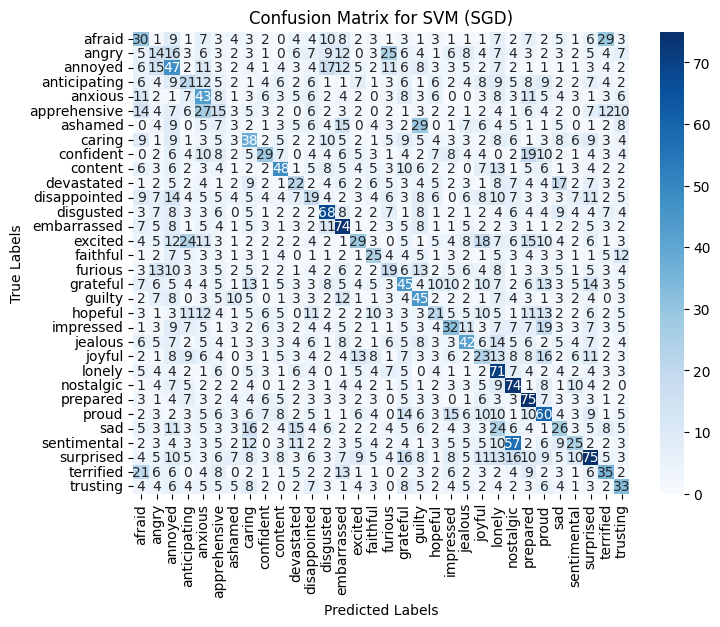


Training Random Forest...
Random Forest Validation Accuracy: 0.23
Random Forest Test Accuracy: 0.22
              precision    recall  f1-score   support

      afraid       0.19      0.22      0.20       164
       angry       0.14      0.14      0.14       181
     annoyed       0.17      0.20      0.19       198
anticipating       0.22      0.25      0.24       166
     anxious       0.24      0.25      0.24       171
apprehensive       0.08      0.04      0.06       158
     ashamed       0.10      0.06      0.08       143
      caring       0.20      0.14      0.16       177
   confident       0.22      0.23      0.22       170
     content       0.29      0.26      0.27       172
  devastated       0.14      0.12      0.13       148
disappointed       0.20      0.12      0.15       188
   disgusted       0.29      0.35      0.32       190
 embarrassed       0.32      0.34      0.33       179
     excited       0.19      0.23      0.21       202
    faithful       0.32      0.17 

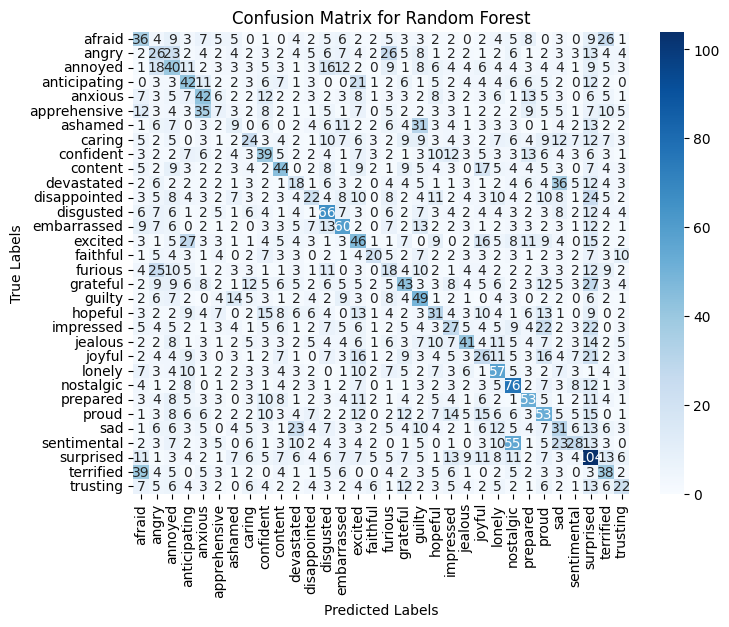


Training Logistic Regression...
Logistic Regression Validation Accuracy: 0.28
Logistic Regression Test Accuracy: 0.26
              precision    recall  f1-score   support

      afraid       0.28      0.29      0.28       164
       angry       0.18      0.17      0.17       181
     annoyed       0.24      0.25      0.25       198
anticipating       0.27      0.23      0.25       166
     anxious       0.24      0.25      0.24       171
apprehensive       0.19      0.08      0.11       158
     ashamed       0.13      0.08      0.10       143
      caring       0.25      0.20      0.22       177
   confident       0.21      0.24      0.22       170
     content       0.33      0.35      0.34       172
  devastated       0.24      0.20      0.22       148
disappointed       0.24      0.16      0.20       188
   disgusted       0.33      0.38      0.35       190
 embarrassed       0.40      0.37      0.39       179
     excited       0.21      0.25      0.23       202
    faithful    

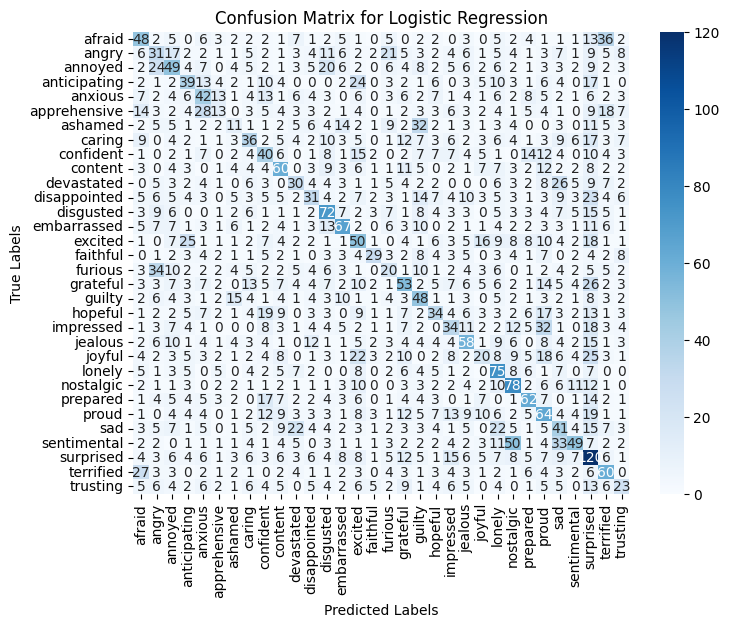


Training K-Nearest Neighbors...
K-Nearest Neighbors Validation Accuracy: 0.10
K-Nearest Neighbors Test Accuracy: 0.09
              precision    recall  f1-score   support

      afraid       0.06      0.25      0.10       164
       angry       0.05      0.13      0.08       181
     annoyed       0.07      0.17      0.10       198
anticipating       0.04      0.14      0.07       166
     anxious       0.05      0.10      0.06       171
apprehensive       0.04      0.06      0.04       158
     ashamed       0.06      0.06      0.06       143
      caring       0.07      0.10      0.08       177
   confident       0.07      0.10      0.08       170
     content       0.09      0.09      0.09       172
  devastated       0.06      0.06      0.06       148
disappointed       0.07      0.03      0.04       188
   disgusted       0.16      0.13      0.14       190
 embarrassed       0.23      0.09      0.13       179
     excited       0.11      0.10      0.11       202
    faithful    

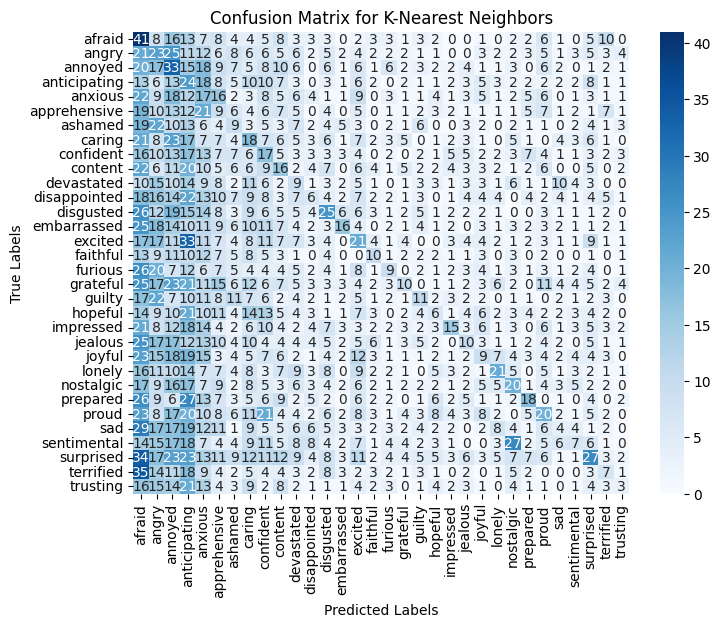

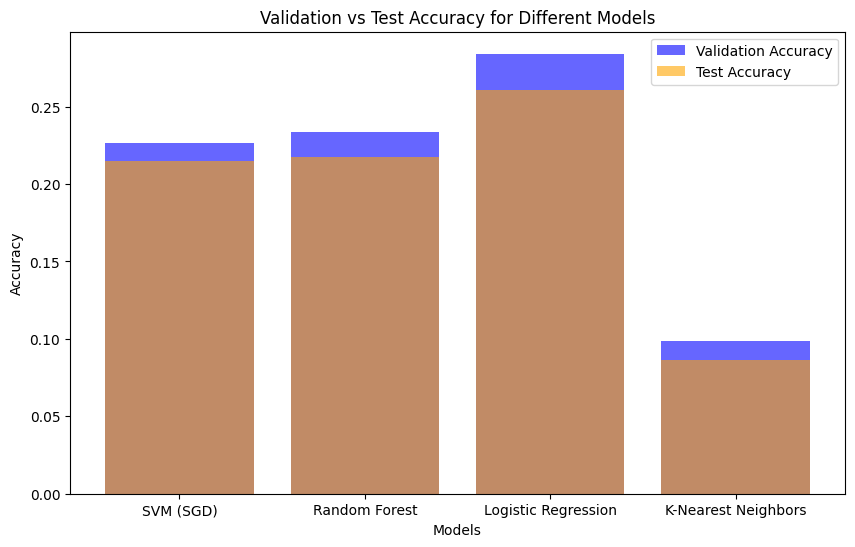

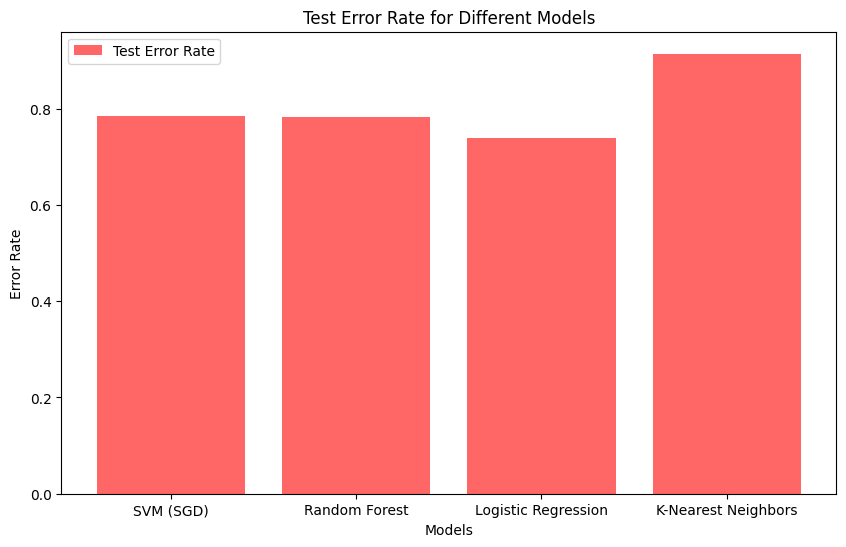


Sample Case:
Text: It's definitely a hard situation to take in. He had stopped using when we started dating and was off it for 2 years until we broke up. It's very discouraging.
Actual Label: disappointed
Prediction by SVM (SGD): trusting
Prediction by Random Forest: proud
Prediction by Logistic Regression: lonely
Prediction by K-Nearest Neighbors: proud

Sample Case:
Text: No_comma_ moving to a 1-bedroom apartment. I don't have a girlfriend - I had a husband_comma_ but we split up.
Actual Label: content
Prediction by SVM (SGD): grateful
Prediction by Random Forest: annoyed
Prediction by Logistic Regression: afraid
Prediction by K-Nearest Neighbors: impressed

Sample Case:
Text: My childhood friend gave me a watch for by birthday a few years ago_comma_ I lost it in a move recently. I'm pretty upset by it.
Actual Label: devastated
Prediction by SVM (SGD): nostalgic
Prediction by Random Forest: surprised
Prediction by Logistic Regression: sad
Prediction by K-Nearest Neighbors: annoyed


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
train_df = pd.read_csv('updated_empathetic_dialogues_train.csv', on_bad_lines='skip')
val_df = pd.read_csv('updated_empathetic_dialogues_val.csv', on_bad_lines='skip')
test_df = pd.read_csv('updated_empathetic_dialogues_test.csv', on_bad_lines='skip')

# Step 2: Encode the labels
label_encoder = LabelEncoder()
train_df["context_encoded"] = label_encoder.fit_transform(train_df["context"])
val_df["context_encoded"] = label_encoder.transform(val_df["context"])
test_df["context_encoded"] = label_encoder.transform(test_df["context"])

# Step 3: Prepare the data
train_texts = train_df["utterance"].tolist()
train_labels = train_df["context_encoded"].tolist()

valid_texts = val_df["utterance"].tolist()
valid_labels = val_df["context_encoded"].tolist()

test_texts = test_df["utterance"].tolist()
test_labels = test_df["context_encoded"].tolist()

# Step 4: Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train = vectorizer.fit_transform(train_texts)
X_valid = vectorizer.transform(valid_texts)
X_test = vectorizer.transform(test_texts)

# Step 5: Initialize classifiers
classifiers = {
    "SVM (SGD)": SGDClassifier(loss="hinge", max_iter=1000, random_state=42, n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
}

# Step 6: Train and evaluate each classifier
results = {}

def plot_confusion_matrix(y_true, y_pred, model_name, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

for name, clf in classifiers.items():
    print(f"\nTraining {name}...")

    # Train the classifier
    clf.fit(X_train, train_labels)

    # Evaluate on validation data
    valid_predictions = clf.predict(X_valid)
    valid_accuracy = accuracy_score(valid_labels, valid_predictions)

    # Evaluate on test data
    test_predictions = clf.predict(X_test)
    test_accuracy = accuracy_score(test_labels, test_predictions)

    # Store results
    results[name] = {
        "model": clf,
        "validation_accuracy": valid_accuracy,
        "test_accuracy": test_accuracy,
        "test_predictions": test_predictions,
    }

    print(f"{name} Validation Accuracy: {valid_accuracy:.2f}")
    print(f"{name} Test Accuracy: {test_accuracy:.2f}")
    print(classification_report(test_labels, test_predictions, target_names=label_encoder.classes_))

    # Plot confusion matrix using enhanced visualization
    plot_confusion_matrix(test_labels, test_predictions, name, label_encoder.classes_)

# Step 7: Plot Accuracy Graphs
models = list(results.keys())
validation_accuracies = [results[model]["validation_accuracy"] for model in models]
test_accuracies = [results[model]["test_accuracy"] for model in models]

plt.figure(figsize=(10, 6))
plt.bar(models, validation_accuracies, color="blue", alpha=0.6, label="Validation Accuracy")
plt.bar(models, test_accuracies, color="orange", alpha=0.6, label="Test Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Validation vs Test Accuracy for Different Models")
plt.legend()
plt.show()

# Step 8: Plot Test Loss (Error Rate)
test_errors = [1 - acc for acc in test_accuracies]
plt.figure(figsize=(10, 6))
plt.bar(models, test_errors, color="red", alpha=0.6, label="Test Error Rate")
plt.xlabel("Models")
plt.ylabel("Error Rate")
plt.title("Test Error Rate for Different Models")
plt.legend()
plt.show()

# Step 9: Sample Predictions
sample_indices = np.random.choice(len(test_texts), 3, replace=False)
for idx in sample_indices:
    print("\nSample Case:")
    print(f"Text: {test_texts[idx]}")
    actual_label = label_encoder.inverse_transform([test_labels[idx]])[0]
    print(f"Actual Label: {actual_label}")
    for name, result in results.items():
        predicted_label = label_encoder.inverse_transform([result["test_predictions"][idx]])[0]
        print(f"Prediction by {name}: {predicted_label}")
